In [21]:
import os

import diffusers
from diffusers import *
import torch
from glob import glob
from diffusers.utils import load_image

os.chdir("/home/ohada/ProjectBDir")

In [22]:
import sys
sys.executable

'/home/ohada/DeepProject/DeepProject/ProjectPath/venv/bin/python3'

In [23]:
def unclip():
    pipe = StableUnCLIPImg2ImgPipeline.from_pretrained(
        "stabilityai/stable-diffusion-2-1-unclip", torch_dtype=torch.float16, variation="fp16"
    )
    pipe = pipe.to("cuda")
    with torch.no_grad():
        images = [load_image(path) for path in sorted(glob("horse2zebra/*.jpg"))]
        image_embeds = [pipe._encode_image(
                image=(im,),
                device=pipe.device,
                batch_size=len(images),
                num_images_per_prompt=1,
                do_classifier_free_guidance=False,
                noise_level=torch.zeros((1,), device="cuda", dtype=torch.int),
                generator=None,
                image_embeds=None,
            ) for im in images]
        horse_embeds, zebra_embeds = torch.cat(image_embeds).chunk(2, dim=0)
        diff = (zebra_embeds[1:] - horse_embeds[1:]).mean(0)

        images_zebras = pipe(image_embeds=(horse_embeds[0]+diff)[None, :1024]).images
    images_zebras[0].save("variation_image.png")
    return images_zebras[0]

Keyword arguments {'variation': 'fp16'} are not expected by StableUnCLIPImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

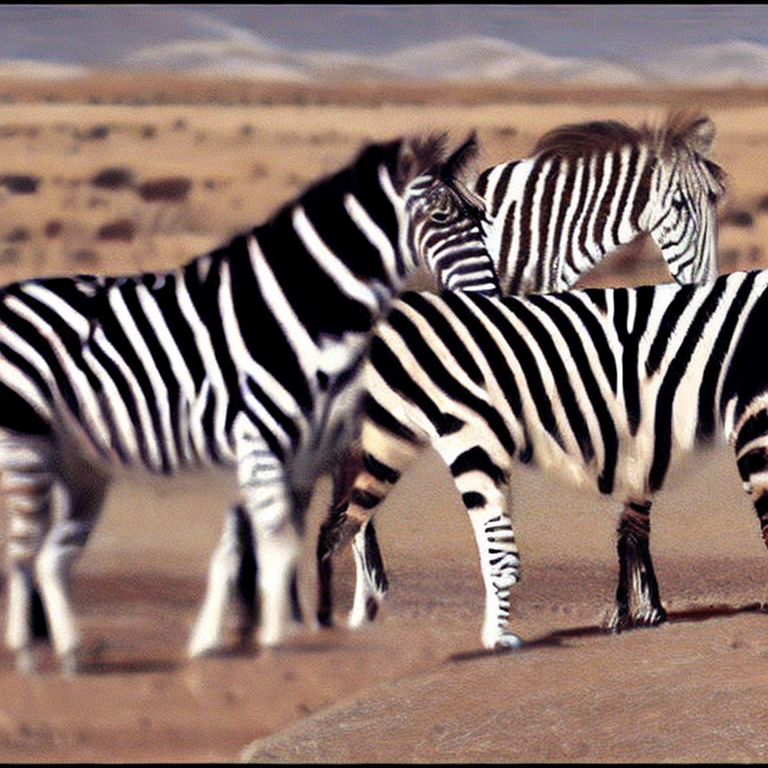

In [26]:
img = unclip()
img